In [103]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn matplotlib pandas

In [104]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from typing import Dict, Tuple, Union, List

# Práctica 2: Preprocesamiento Básico

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones. Cada función está marcada por &#x1F625;,  &#x1F643; o &#x1F921;. Las marcas indican:

- &#x1F625;: Indican una entrega que debe ser hecha dentro de la misma sesión de la asignación. 
- &#x1F643;: Indican una entrega que puede ser hecha hasta la siguiente sesión.
- &#x1F921;: Debe mostrar un avance en la misma sesión, pero la entrega puede ser hecha en la siguiente.

Aquellas entregas parciales que no sean hechas el día de la asignación ya no serán válidas para las entregas totales, sin embargo, las entregas totales seguirán siendo válidas.

En esta sección se incluye un dataset real. El dataset importado incluye multiples características que describen las condiciones de los pasajeros en el accidente del titanic.

- __PassengerId__: Identificador de cada pasajero.
- __Survived__: 0 si no sobrevivió al accidente, 1 si lo hizo.
- __Pclass__: Clase en la que viajaba el pasajero, 1 - Primera clase, 2 - Segunda clase y 3 - Tercera clase.
- __Name__: Nombre del pasajero.
- __Sex__: Sexo del pasajero.
- __Age__: Edad del pasajero.
- __SibSp__: Número de hermanos más número de esposas con las que viajaba el pasajero.
- __Parch__: Número de padres más número de hijos con las que viajaba el pasajero.
- __Ticket__: Número de boleto.
- __Fare__: Tarifa del boleto del pasajero.
- __Cabin__: Número de cabina del pasajero.
- __Embarked__: Puerto de embarcación, C - Cherbourg, Q - Queenstown y S - Southampton.


In [105]:
df = pd.read_csv("titanic.csv")
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## Asignación 1 &#x1F625;

En una sola figura grafique el histograma de la edad, el histograma de la edad centrado en una media de 0 y desviación estándar de 1, y el histograma de la edad acotado a que el valor mínimo sea 0 y el máximo sea 1.

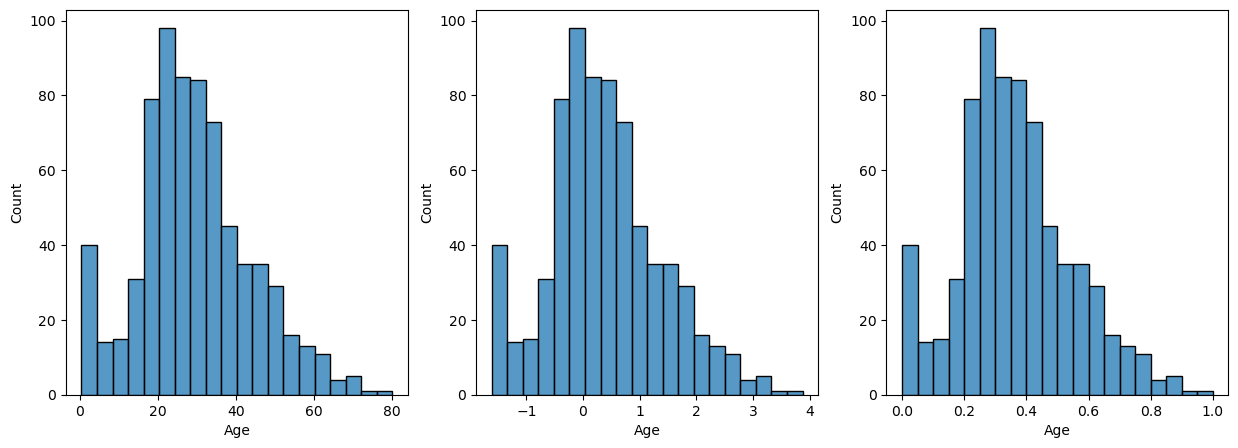

In [106]:
fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

plt_edad = sns.histplot(data = df, x = "Age", ax=axs[0])

# Histograma edad centrado \mu = 0 y \sigma = 1
edad = df["Age"]
media_edad = np.sum(edad)/len(edad)
sd = np.std(edad)
edad_escalada = (edad - media_edad)/sd
plt_escalado = sns.histplot(x = edad_escalada, ax=axs[1])

# Histograma edad centrado min = 0 y máx = 1
min_edad = np.amin(edad)
max_edad = np.amax(edad)

# print(min_edad, max_edad)
edad_centrada = (edad-min_edad)/(max_edad-min_edad)
plt_centrado = sns.histplot(x = edad_centrada, ax = axs[2])

## Asignación 2 &#x1F625;

Calcule e imprima el skewness de la tarifa. Grafique su histograma. Aplique la función de su preferencia para remover el skewness, calcule e imprima el valor del skewness para la función transformada y grafique su histograma.

In [107]:
def calculate_skewness(column, formula = "Normalized"):

    if formula == "Normalized":
        n = len(column)
        mean = np.mean(column)
        sd = np.std(column)

        column = (column-mean)/sd

        return np.mean(column**3)

    elif(formula == "Pearson"):
        mean = np.mean(column)
        median = np.median(column)
        sd = np.std(column)
        return 3*(mean -  median)/sd
        
    else:
        print("Error!, no se encontró la formula especificada")

Skewness de la tercera normalización de la tarifa es:  4.779253292372355
Skewness Pearson de la tarifa es:  1.0721725740198285


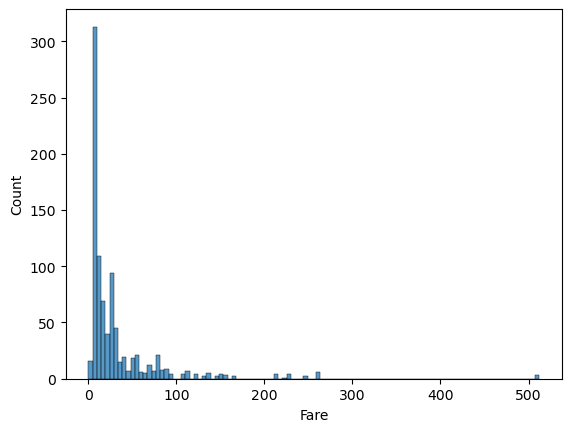

In [108]:
tarifa = df["Fare"]

skewness_normalized = calculate_skewness(tarifa, "Normalized")
skewness_pearson = calculate_skewness(tarifa, "Pearson")

print("Skewness de la tercera normalización de la tarifa es: ", skewness_normalized)
print("Skewness Pearson de la tarifa es: ", skewness_pearson)
plt_tarifa = sns.histplot(data = df, x = "Fare")

Ahora la skewness es:  0.8745274747425646


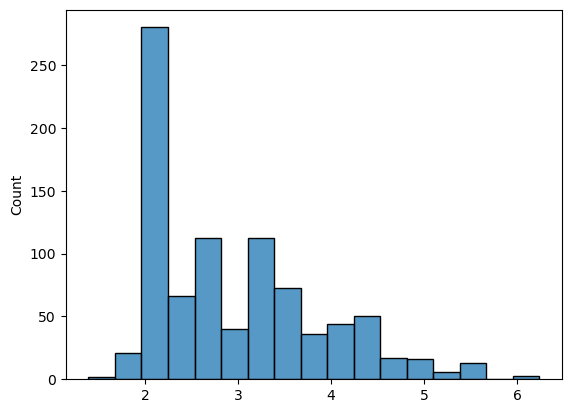

In [109]:
tarifa = np.where(tarifa == 0, np.mean(tarifa), tarifa)
tarifa_wskew = np.log(tarifa)

plt_tarifa_log = sns.histplot(x = tarifa_wskew)

skewness = calculate_skewness(tarifa_wskew)
print("Ahora la skewness es: ", skewness)

## Asignación 3 &#x1F921;

Convierta la características __Sex__ y __Embarked__ a su versión de One hot encoding y agreguelas al dataframe original.

In [110]:
n = len(df["Sex"])
embarked = df["Embarked"]

male = np.zeros(n)
female = np.zeros(n)

for i, value in enumerate(df["Sex"]):
    if value == "male": male[i] = 1
    elif value == "female": female[i] = 1

df["male"] = male.tolist()
df["female"] = female.tolist()

cherbourg = np.zeros(n)
queenstown = np.zeros(n)
southhampton = np.zeros(n)

for i, value in enumerate(df["Embarked"]):
    if value == "C": cherbourg[i] = 1
    elif value == "Q": queenstown[i] = 1
    elif value == "S": southhampton[i] = 1

df["cherbourg"] = cherbourg.tolist()
df["queenstown"] = queenstown.tolist()
df["southhampton"] = southhampton.tolist()

df = df.drop(["Sex", "Embarked"], axis = 1)
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,male,female,cherbourg,queenstown,southhampton
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1.0,0.0,0.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0.0,1.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1.0,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0.0,1.0,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1.0,0.0,0.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0.0,1.0,0.0,0.0,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0.0,1.0,0.0,0.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1.0,0.0,1.0,0.0,0.0


## Asignación 4 &#x1F643;

Implemente PCA dentro de una función (usted debe definirla) y apliquela para gráficar en un scatterplot de dos dimensiones los datos. (No incluya las características __Name__, __Ticket__ y __Cabin__).

In [114]:
def escalar_dataframe(data):
    data_scaled = data
    for i in data.columns:
        media = np.sum(data[i])/len(data[i])
        sd = np.std(data[i])
        data_scaled[i] = (data[i] - media)/sd

    return data

In [121]:
def pca(data):
    n = data.shape[0]
    x = data.shape[1]

    X = np.matrix(np.zeros((n, x)))
    w = np.zeros(x)
    
    return data

In [122]:
df_pca = df.drop(["Name", "Ticket", "Cabin"], axis = 1)
df_pca = escalar_dataframe(df_pca)
pca(df_pca)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,female,cherbourg,queenstown,southhampton
0,-1.730108,-0.789272,0.827377,-0.123950,0.432793,-0.473674,-0.502445,0.737695,-0.737695,-0.482043,-0.307562,0.619306
1,-1.726220,1.266990,-1.566107,0.978258,0.432793,-0.473674,0.786845,-1.355574,1.355574,2.074505,-0.307562,-1.614710
2,-1.722332,1.266990,0.827377,0.151602,-0.474545,-0.473674,-0.488854,-1.355574,1.355574,-0.482043,-0.307562,0.619306
3,-1.718444,1.266990,-1.566107,0.771594,0.432793,-0.473674,0.420730,-1.355574,1.355574,-0.482043,-0.307562,0.619306
4,-1.714556,-0.789272,0.827377,0.771594,-0.474545,-0.473674,-0.486337,0.737695,-0.737695,-0.482043,-0.307562,0.619306
...,...,...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.789272,-0.369365,0.220490,-0.474545,-0.473674,-0.386671,0.737695,-0.737695,-0.482043,-0.307562,0.619306
887,1.718444,1.266990,-1.566107,-0.330614,-0.474545,-0.473674,-0.044381,-1.355574,1.355574,-0.482043,-0.307562,0.619306
888,1.722332,-0.789272,0.827377,NaN,0.432793,2.008933,-0.176263,-1.355574,1.355574,-0.482043,-0.307562,0.619306
889,1.726220,1.266990,-1.566107,0.151602,-0.474545,-0.473674,-0.044381,0.737695,-0.737695,2.074505,-0.307562,-1.614710
